  $G_i + P \quad[k^{b_P}_i]<->[k^{u_P}_i] \quad  G_i:P \\
    G_i:P \quad  --> [k_i^{tx}] \quad  G_i + P + T_i \\
    T_i + R \quad  [k^{b_R}_i]<->[k^{u_R}_i]\quad   T_i:R \\
    T_i:R  \quad -->[k_i^{tl}]\quad T_i + R + X_i \\
    T_i + E \quad  [k^{b_E}_i]<->[k^{u_E}_i] \quad  T_i:E \\
    T_i:E \quad-->[\delta_i]\quad E \\
    X \quad-->[d]\quad $

In [1]:
%matplotlib inline
from auto_reduce import *
import numpy as np
from sympy import symbols

In [2]:
# Post conservation law and other approximations phenomenological model at the RNA level
n = 9 # Number of states : G, P, C1, T, R, C2, E, C3, X
nouts = 1 # Number of outputs, X_i

# Inputs by user 
x_init = np.zeros(n)
x_init[0] = 10
x_init[1] = 10000
x_init[4] = 10000
x_init[6] = 10000
C = np.zeros( (n, nouts) )
C = np.zeros((nouts,n), dtype=int)
C[0][8] = 1
C = C.tolist()

nstates_tol = 8
error_tol = 3000
# System dynamics symbolically

# k_bp, k_up, k_tx, k_br, k_ur, k_tl, k_be, k_ue, d_i, d = params, len(params) = 10

x0 = symbols('G')
x1 = symbols('P')
x2 = symbols('C1') # G:P
x3 = symbols('T')
x4 = symbols('R')
x5 = symbols('C2') # T:R
x6 = symbols('E')
x7 = symbols('C3') # T:E
x8 = symbols('X')

x = [x0, x1, x2, x3, x4, x5, x6, x7, x8]

k_bp = symbols('k_bp')
k_up = symbols('k_up')
k_tx = symbols('k_tx')
k_br = symbols('k_br')
k_ur = symbols('k_ur')
k_tl = symbols('k_tl')
k_be = symbols('k_be')
k_ue = symbols('k_ue')
d_i = symbols('d_i')
d = symbols('d')
params = [k_bp, k_up, k_tx, k_br, k_ur, k_tl, k_be, k_ue, d_i, d]
f0 = (k_bp + k_tx) * x2 - k_up * x0 * x1
f1 = (k_bp + k_tx) * x2 - k_up * x0 * x1
f2 = k_bp * x0 * x1 - (k_up + k_tx)*x2
f3 = k_tx * x2 + k_ur * x5 - k_br * x3 * x4
f4 = (k_ur + k_tl) * x5 - k_br * x3 * x4
f5 = k_br * x3 * x4 - (k_ur + k_tl) * x5
f6 = (k_ue + d_i) * x7 - k_be * x3 * x6
f7 = k_be * x3 * x6 - (k_ue + d_i) * x7
f8 = k_tl * x5 - d * x8
    
f = [f0,f1,f2,f3,f4,f5,f6,f7,f8]
# parameter values
params_values = [100, 10, 4, 10, 0.25, 2, 10, 0.5, 1, 0.1]
sys = System(x, f, params = params, params_values = params_values, C = C, x_init = x_init)

C:\Users\apand\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


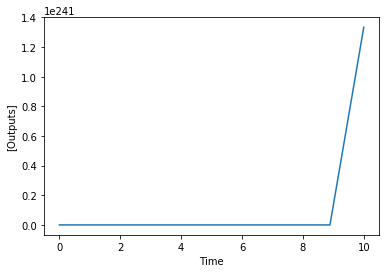

In [3]:
from auto_reduce.utils import get_ODE
timepoints_ode = np.linspace(0, 10, 10)
sys_ode = get_ODE(sys, timepoints_ode)
sol = sys_ode.solve_system().T
import matplotlib.pyplot as plt
plt.plot(timepoints_ode, np.transpose(np.array(C)@sol))
plt.xlabel('Time')
plt.ylabel('[Outputs]')
plt.show()

In [5]:
from auto_reduce.utils import get_SSM
timepoints_ssm = np.linspace(0,100,10)
sys_ssm = get_SSM(sys, timepoints_ssm)
Ss = sys_ssm.compute_SSM() # len(timepoints) x len(params) x len(states)
out_Ss = []
for i in range(len(params)):
    out_Ss.append((np.array(C)@(Ss[:,i,:].T)))
out_Ss = np.reshape(np.array(out_Ss), (len(timepoints_ssm), len(params), nouts))

C:\Users\apand\synBio\auto_reduce\auto_reduce\local_sensitivity.py:115: RuntimeWarning: invalid value encountered in matmul
  dsdt = J@x + Z
C:\Users\apand\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


C:\Users\apand\synBio\auto_reduce\auto_reduce\local_sensitivity.py:100: RuntimeWarning: invalid value encountered in add
  J[i,j]= (-F[0] + 8*F[1] - 8*F[2] + F[3])/(12*h)


C:\Users\apand\synBio\auto_reduce\auto_reduce\local_sensitivity.py:60: RuntimeWarning: invalid value encountered in add
  Z[i] = (-F[0] + 8*F[1] - 8*F[2] + F[3])/(12*h)


C:\Users\apand\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


C:\Users\apand\synBio\auto_reduce\auto_reduce\local_sensitivity.py:115: RuntimeWarning: overflow encountered in matmul
  dsdt = J@x + Z


C:\Users\apand\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete


C:\Users\apand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in matmul
  import sys


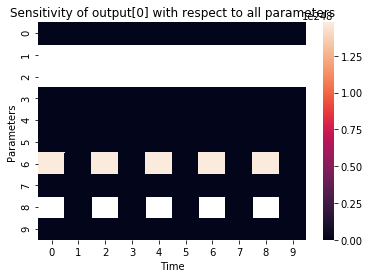

In [6]:
import seaborn as sn
import matplotlib.pyplot as plt
for j in range(nouts):
    sn.heatmap(out_Ss[:,:,j].T)
    plt.xlabel('Time')
    plt.ylabel('Parameters')
    plt.title('Sensitivity of output[{0}] with respect to all parameters'.format(j))
    plt.show()

In [3]:
from auto_reduce.utils import reduce
timepoints_ssm = np.linspace(0,100,10)
timepoints_ode = np.linspace(0, 100, 100)
sys_reduce = reduce(sys, timepoints_ode, timepoints_ssm)
sys_reduce.nstates_tol = 6
results = sys_reduce.reduce_Cx()

attempting : [8]


C:\Users\apand\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


attempting : [0, 8]
attempting : [1, 8]
attempting : [2, 8]
attempting : [3, 8]
attempting : [4, 8]
attempting : [5, 8]
attempting : [6, 8]
attempting : [7, 8]
attempting : [0, 1, 8]
attempting : [0, 2, 8]
attempting : [0, 3, 8]
attempting : [0, 4, 8]
attempting : [0, 5, 8]
attempting : [0, 6, 8]
attempting : [0, 7, 8]
attempting : [1, 2, 8]
attempting : [1, 3, 8]
attempting : [1, 4, 8]
attempting : [1, 5, 8]
attempting : [1, 6, 8]
attempting : [1, 7, 8]
attempting : [2, 3, 8]
attempting : [2, 4, 8]
attempting : [2, 5, 8]
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete


C:\Users\apand\synBio\auto_reduce\auto_reduce\local_sensitivity.py:100: RuntimeWarning: overflow encountered in true_divide
  J[i,j]= (-F[0] + 8*F[1] - 8*F[2] + F[3])/(12*h)
C:\Users\apand\synBio\auto_reduce\auto_reduce\local_sensitivity.py:100: RuntimeWarning: invalid value encountered in add
  J[i,j]= (-F[0] + 8*F[1] - 8*F[2] + F[3])/(12*h)


attempting : [2, 6, 8]
attempting : [2, 7, 8]
attempting : [3, 4, 8]
attempting : [3, 5, 8]
attempting : [3, 6, 8]
attempting : [3, 7, 8]
attempting : [4, 5, 8]
attempting : [4, 6, 8]
attempting : [4, 7, 8]
attempting : [5, 6, 8]
attempting : [5, 7, 8]
attempting : [6, 7, 8]
attempting : [0, 1, 2, 8]
attempting : [0, 1, 3, 8]
attempting : [0, 1, 4, 8]
attempting : [0, 1, 5, 8]


C:\Users\apand\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
attempting : [0, 1, 6, 8]
attempting : [0, 1, 7, 8]
attempting : [0, 2, 3, 8]
attempting : [0, 2, 4, 8]
attempting : [0, 2, 5, 8]
The error is zero or NaN, something wrong...continuing.
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
attempting : [0, 2, 6, 8]
attempting : [0, 2, 7, 8]
attempting : [0, 3, 4, 8]
attempting : [0, 3, 5, 8]
attempting : [0, 3, 6, 8]
attempting : [0, 3, 7, 8]
attempting : [0, 4, 5, 8]
attempting : [0, 4, 6, 8]
attempting : [0, 4, 7, 8]
attempting : [0, 5, 6, 8]
attempting : [0, 5, 7, 8]
attempting : [0, 6, 7, 8]
attempting : [1, 2, 3, 8]
attempting : [1, 2, 4, 8]
attempting : [1, 2, 5, 8]
The error is zero or NaN, something wrong...continuing.
SSM Progress: |█████████████████████

<string>:4: RuntimeWarning: invalid value encountered in double_scalars
<string>:4: RuntimeWarning: invalid value encountered in double_scalars


The error is zero or NaN, something wrong...continuing.
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete


<string>:4: RuntimeWarning: invalid value encountered in double_scalars


SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete


C:\Users\apand\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\_solvers.py:196: RuntimeWarning: Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.
  RuntimeWarning)
C:\Users\apand\synBio\auto_reduce\auto_reduce\model_reduction.py:176: ComplexWarning: Casting complex values to real discards the imaginary part
  Se[j] = max_eigP + 2*len(reduced_ssm.timepoints)*S_metric_max


attempting : [2, 6, 7, 8]s: |████████████████████████--------------------------| 49.5% Complete
attempting : [3, 4, 5, 8]
attempting : [3, 4, 6, 8]
attempting : [3, 4, 7, 8]
attempting : [3, 5, 6, 8]
attempting : [3, 5, 7, 8]
attempting : [3, 6, 7, 8]
attempting : [4, 5, 6, 8]
attempting : [4, 5, 7, 8]
attempting : [4, 6, 7, 8]
attempting : [5, 6, 7, 8]
attempting : [0, 1, 2, 3, 8]
attempting : [0, 1, 2, 4, 8]
attempting : [0, 1, 2, 5, 8]
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
attempting : [0, 1, 2, 6, 8]|█████████-----------------------------------------| 19.2% Complete
attempting : [0, 1, 2, 7, 8]
attempting : [0, 1, 3, 4, 8]
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete


C:\Users\apand\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
attempting : [0, 1, 3, 5, 8]|█████████-----------------------------------------| 19.2% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
attempting : [0, 1, 3, 6, 8]|█████████-----------------------------------------| 19.2% Complete
attempting : [0, 1, 3, 7, 8]
attempting : [0, 1, 4, 5, 8]
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
Robustness Metric Progress: |██████████████████████████████████████████████████| 100.0% Complete
attempting : [0, 1, 4, 6, 8]
attempting : [0, 1, 4, 7, 8]
attempting : [0, 1, 5, 6, 8]
attempting : [0, 1, 5, 7, 8]
The error is zero or NaN, something wrong...continuing.


<string>:4: RuntimeWarning: invalid value encountered in double_scalars
<string>:4: RuntimeWarning: invalid value encountered in double_scalars


SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete


<string>:4: RuntimeWarning: invalid value encountered in double_scalars


C:\Users\apand\synBio\auto_reduce\auto_reduce\local_sensitivity.py:60: RuntimeWarning: invalid value encountered in add
  Z[i] = (-F[0] + 8*F[1] - 8*F[2] + F[3])/(12*h)


SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
attempting : [0, 1, 6, 7, 8]|█████████-----------------------------------------| 19.2% Complete
attempting : [0, 2, 3, 4, 8]
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
attempting : [0, 2, 3, 5, 8]|█████████-----------------------------------------| 19.2% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
attempting : [0, 2, 3, 6, 8]|█████████-----------------------------------------| 19.2% Complete
attempting : [0, 2, 3, 7, 8]
attempting : [0, 2, 4, 5, 8]
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
attempting : [0, 2, 4, 6, 8]|███████████████

<string>:4: RuntimeWarning: invalid value encountered in double_scalars
<string>:4: RuntimeWarning: invalid value encountered in double_scalars


SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete


<string>:4: RuntimeWarning: invalid value encountered in double_scalars


SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
attempting : [0, 2, 6, 7, 8]|█████████████████████████████---------------------| 59.6% Complete
attempting : [0, 3, 4, 5, 8]
attempting : [0, 3, 4, 6, 8]
attempting : [0, 3, 4, 7, 8]
attempting : [0, 3, 5, 6, 8]
attempting : [0, 3, 5, 7, 8]
attempting : [0, 3, 6, 7, 8]
attempting : [0, 4, 5, 6, 8]
attempting : [0, 4, 5, 7, 8]
attempting : [0, 4, 6, 7, 8]
attempting : [0, 5, 6, 7, 8]
attempting : [1, 2, 3, 4, 8]
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
Robustness Metric Progress: |██████████████████████████████████████████████████| 100.0% Complete
attempting : [1, 2, 3, 5, 8]
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
Robustness Metric Progress: |███████████████

<string>:4: RuntimeWarning: invalid value encountered in double_scalars
<string>:4: RuntimeWarning: invalid value encountered in double_scalars


SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete


<string>:4: RuntimeWarning: invalid value encountered in double_scalars


SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
attempting : [1, 2, 6, 7, 8]|█████████████████████████████---------------------| 59.6% Complete
attempting : [1, 3, 4, 5, 8]
attempting : [1, 3, 4, 6, 8]
attempting : [1, 3, 4, 7, 8]
attempting : [1, 3, 5, 6, 8]
attempting : [1, 3, 5, 7, 8]
attempting : [1, 3, 6, 7, 8]
attempting : [1, 4, 5, 6, 8]
attempting : [1, 4, 5, 7, 8]
attempting : [1, 4, 6, 7, 8]
attempting : [1, 5, 6, 7, 8]
attempting : [2, 3, 4, 5, 8]
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
Robustness Metric Progress: |██████████████████████████████████████████████████| 100.0% Complete
attempting : [2, 3, 4, 6, 8]
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
Robustness Metric Progress: |███████████████

<string>:4: RuntimeWarning: invalid value encountered in double_scalars
<string>:4: RuntimeWarning: invalid value encountered in double_scalars


SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete


<string>:4: RuntimeWarning: invalid value encountered in double_scalars


SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
attempting : [0, 1, 2, 6, 7, 8]
attempting : [0, 1, 3, 4, 5, 8]
The error is zero or NaN, something wrong...continuing.
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
attempting : [0, 1, 3, 4, 6, 8]███████-----------------------------------------| 19.2% Complete
The error is zero or NaN, something wrong...continuing.
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
attempting : [0, 1, 3, 4, 7, 8]█████████████████-------------------------------| 39.4% Complete
The error is zero or NaN, something wrong...continuing.
SSM Progress: |██████████████████████████████████████████████████| 100.0% Complete
SSM Progress: |██████████████████████████████████████████████████| 100.0% Comp

In [69]:
from sympy.printing import latex
f1 = open('gene_expression_model_reduction_results.txt', 'w')
f1.write('Model reduction results.\n')
for key,value in results.items():
    f1.write('A possible reduced model: \n \n')
    f1.write('\n$x_{hat} = ')
    f1.write(str(key.x))
    f1.write('$\n\n\n\n')
    for k in range(len(key.f)):
        f1.write('\n$f_{hat}('+ str(k+1) + ') = ')
        f1.write(latex(key.f[k]))
        f1.write('$\n\n')
    f1.write('\n\n\n')
    f1.write('\nError metric:')
    f1.write(str(value[0]))
    f1.write('\n\n\n')
    f1.write('\nRobustness metric:')
    f1.write(str(value[1]))
    f1.write('\n\n\n')
    f1.write('Other properties') 
    f1.write('\n\n\n')
    f1.write('\n C = ')
    f1.write(str(key.C))
    f1.write('\n g = ')
    f1.write(str(key.g))
    f1.write('\n h = ')
    f1.write(str(key.h))
    f1.write('\n h = ')
    f1.write(str(key.h))
    f1.write('\n Solutions : \n')
#     f1.write(str(key.x_sol))
    f1.write('\n\n\n\n')
    f1.write('\n Sensitivity Solutions : \n')
#     f1.write(str(key.S))
    f1.write('\n\n\n\n')
f1.close()

In [4]:
sys_reduce.get_output_states()
T, T1, T2 = sys_reduce.get_T([2,3])

In [7]:
# sys_reduce.all_reductions
# aa, bb = sys_reduce.solve_timescale_separation([2,3])
T2

array([[1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.]])

In [18]:
aa.C

array([[1., 1.],
       [1., 1.]])